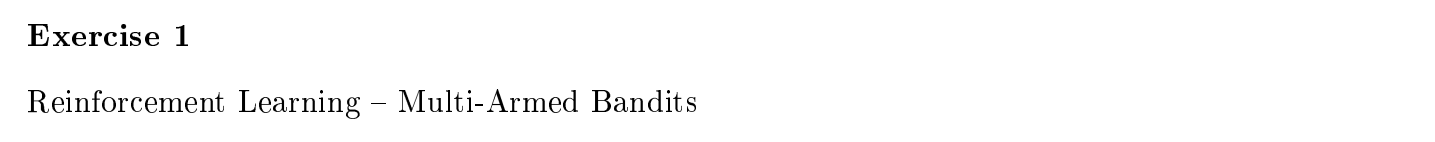

#### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

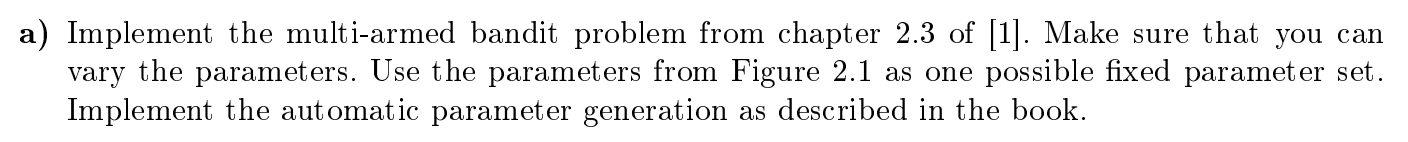

#### Here is the class for bandit algorithm which has paramters of number of arms, mean and variance. It has a function for picking up an action from a normal distribution of our defined mean and variance.

In [7]:
class BanditAlgorithm:
  def __init__(self,number_of_arms,mean,variance):
    self.number_of_arms=number_of_arms
    self.mean=mean
    self.variance=variance
    self.q_optimal=np.random.normal(self.mean,self.variance,self.number_of_arms)

  def pick_arms(self,arm):
    return np.random.normal(self.q_optimal[arm],self.variance)

#### Here is the implementation for epsilon-greedy method for choosing an action, if the action value is lower than epsilon it will explore for a random action, otherwise it will expolit and choose an action with probability (1-epsilon)

In [15]:
def epsilon_greedy(q,epsilon):
  if np.random.uniform()< epsilon:
    action=np.random.randint(0,len(q))
  else:
    action=np.argmax(q)
  return action

#### Here is the function for running the bandit problem:

In [16]:
def run_bandit_problem(number_of_arms,num_pickup,epsilon,alpha,mean,variance):
  bandit=BanditAlgorithm(number_of_arms,mean,variance)
  q=np.zeros(number_of_arms)
  num_optimal=0
  optimal_arm=np.argmax(bandit.q_optimal)
  memory_reward=[]
  memory_optimal=[]

  for i in range(num_pickup):
    arm=epsilon_greedy(q,epsilon)
    reward=bandit.pick_arms(arm)
    memory_reward.append(reward)
    if arm==optimal_arm:
      num_optimal+=1
    memory_optimal.append(num_optimal/(i+1))
    q[arm]+=alpha*(reward-q[arm])
  return memory_reward,memory_optimal

#### Run the algorithm:

In [24]:
number_of_arms = 10
num_pickup= 1000
epsilon = 0.1
alpha = 0.1
mean = 0
variance = 1
memory_reward, memory_optimal = run_bandit_problem(number_of_arms, num_pickup, epsilon, alpha, mean, variance)

#### Draw the plots for reward and optimal action:

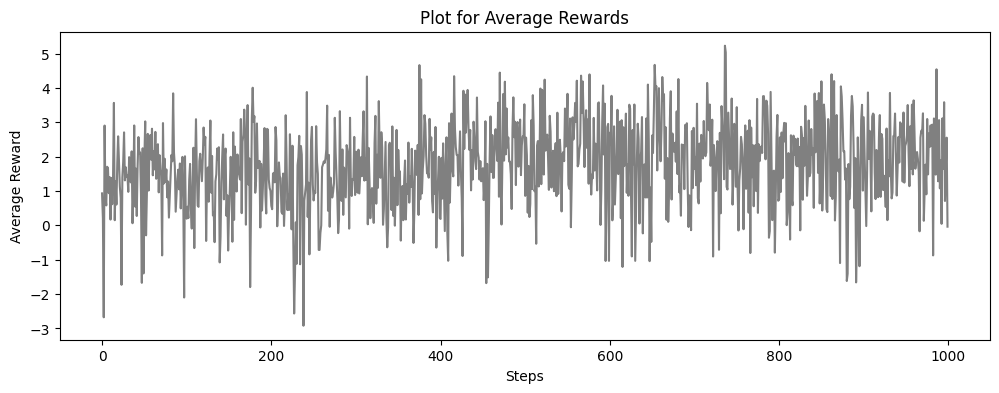

In [32]:
fig=plt.figure(figsize=(12,4))
plt.plot(memory_reward,color='gray')
plt.title('Plot for Average Rewards')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.show()

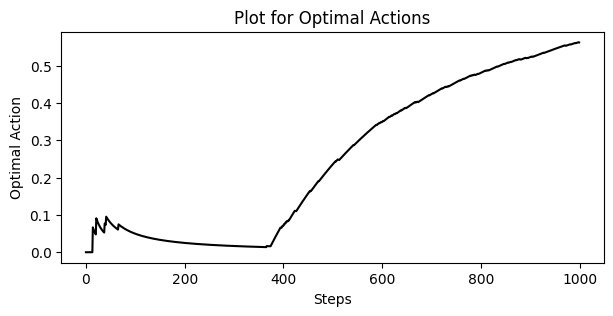

In [35]:
plt.figure(figsize=(7,3))
plt.plot(memory_optimal,color='black')
plt.title('Plot for Optimal Actions')
plt.xlabel('Steps')
plt.ylabel('Optimal Action')
plt.show()

#### Automatic parameter generation:

In [74]:
def parameters(num_arms, num_pulls, num_runs):
    epsilons = [0, 0.01, 0.1]
    alphas = [0.1]
    mean_rewards = np.zeros((len(epsilons), num_pulls))
    optimal_actions = np.zeros((len(epsilons), num_pulls))

    for i, epsilon in enumerate(epsilons):
        for run in range(num_runs):
            reward_history, optimal_history = run_bandit_problem(num_arms, num_pulls, epsilon, alphas[0])
            mean_rewards[i] += (1 / num_runs) * (1 / num_pulls) * np.sum(np.array(reward_history))
            optimal_actions[i] += (1 / num_runs) * np.array(optimal_history)
    
    return epsilons, mean_rewards, optimal_actions

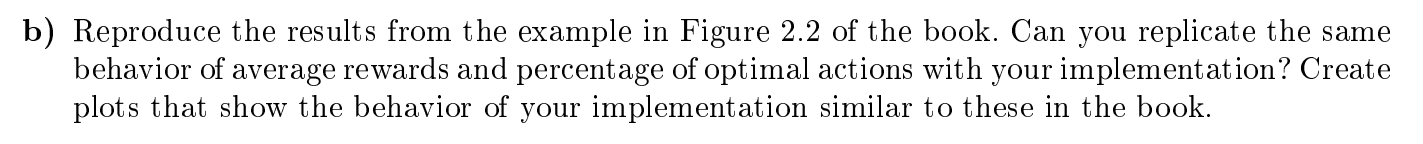

#### Plot the behavior of average rewards:

In [75]:
def plot_myResult(epsilons, mean_rewards, optimal_actions):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    ax[0].plot(mean_rewards[0], label='Greedy')
    ax[0].plot(mean_rewards[1], label=r'$\epsilon=0.01$')
    ax[0].plot(mean_rewards[2], label=r'$\epsilon=0.1$')
    ax[0].set_xlabel('Steps')
    ax[0].set_ylabel('Average Reward')
    ax[0].set_title('Average Reward over Time')
    ax[0].legend()
    
    ax[1].plot(optimal_actions[0], label='Greedy')
    ax[1].plot(optimal_actions[1], label=r'$\epsilon=0.01$')
    ax[1].plot(optimal_actions[2], label=r'$\epsilon=0.1$')
    ax[1].set_xlabel('Steps')
    ax[1].set_ylabel('% Optimal Action')
    ax[1].set_title('% Optimal Action over Time')
    ax[1].legend()
    
    plt.show()

#### Run the algorithm with automate generated parameters:

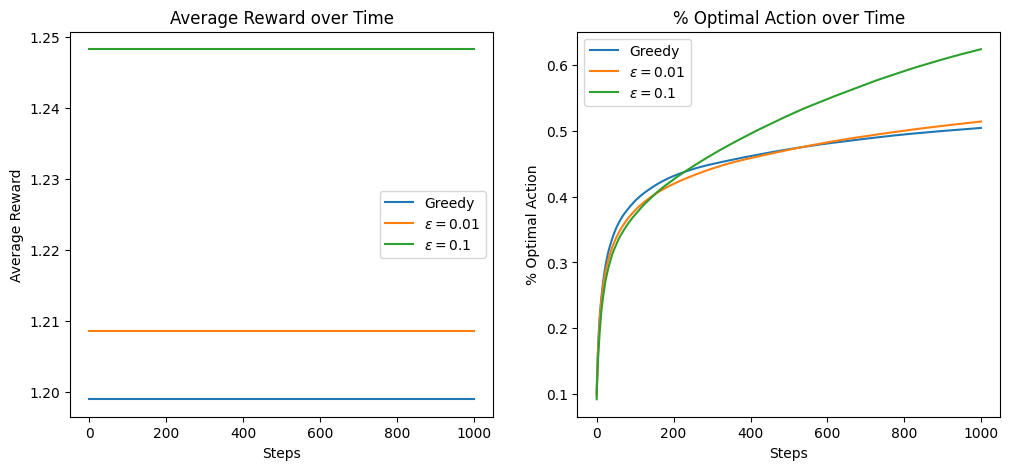

In [76]:
num_arms = 10
num_pulls = 1000
num_runs = 2000
epsilons, mean_rewards, optimal_actions = parameters(num_arms, num_pulls, num_runs)
plot_myResult(epsilons, mean_rewards, optimal_actions)

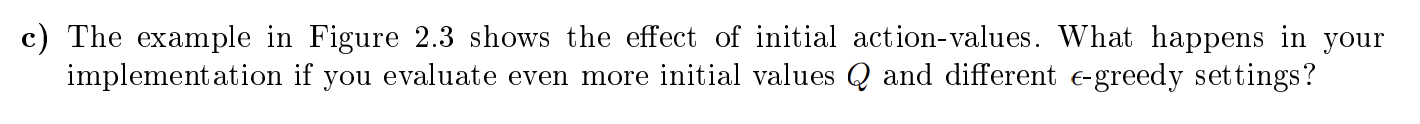

#### Larger initial action values lead to higher initial performance, but this effect decreases over time. And, larger ε values lead to more exploration.

#### Modify the bandit problem with a new parameter q_init:

In [86]:
def run_bandit_problem2(num_arms, num_pulls, epsilon, alpha, mean, variance, q_init):
    bandit = BanditAlgorithm(num_arms, mean, variance)
    q = np.full(num_arms, q_init)
    num_optimal = 0
    optimal_arm = np.argmax(bandit.q_optimal)
    reward_history = []
    optimal_history = []
    
    for i in range(num_pulls):
        arm = epsilon_greedy(q, epsilon)
        reward = bandit.pick_arms(arm)
        reward_history.append(reward)
        
        if arm == optimal_arm:
            num_optimal += 1
        optimal_history.append(num_optimal / (i + 1))
        
        q[arm] += alpha * (reward - q[arm])
    
    return reward_history, optimal_history

#### We define the parameters including the q_inite values:

In [93]:
def run_parameter(num_arms, num_pulls, num_runs):
    epsilons = [0.01, 0.1, 0.5]
    q_inits = [-5, 0, 5]
    alphas = [0.1]
    mean_rewards = np.zeros((len(epsilons), len(q_inits)))
    optimal_actions = np.zeros((len(epsilons), len(q_inits)))

    for i, epsilon in enumerate(epsilons):
        for j, q_init in enumerate(q_inits):
            for run in range(num_runs):
                reward_history, optimal_history = run_bandit_problem2(num_arms, num_pulls, epsilon, alphas[0], 0, 1, q_init)
                mean_rewards[i, j] += (1 / num_runs) * (1 / num_pulls) * np.sum(reward_history)
                optimal_actions[i, j] += (1 / num_runs) * optimal_history[-1]
    
    return epsilons, q_inits, mean_rewards, optimal_actions

#### Plot for initial action-values and ε values:

In [125]:
def plot_results_optimal_actions(epsilons, q_inits, optimal_actions):
    fig, ax = plt.subplots(figsize=(8, 4))
    for i in range(len(q_inits)):
        for j in range(len(epsilons)):
            ax.plot(optimal_actions[i, j], label=f'Init: {q_inits[i]}, Eps: {epsilons[j]}')
    ax.set_xlabel('Steps')
    ax.set_ylabel('% Optimal Action')
    ax.legend(loc='best')
    ax.set_title('Effect of Initial Action-Values and ε on Optimal Action Performance')
    plt.show()

#### Run the function:

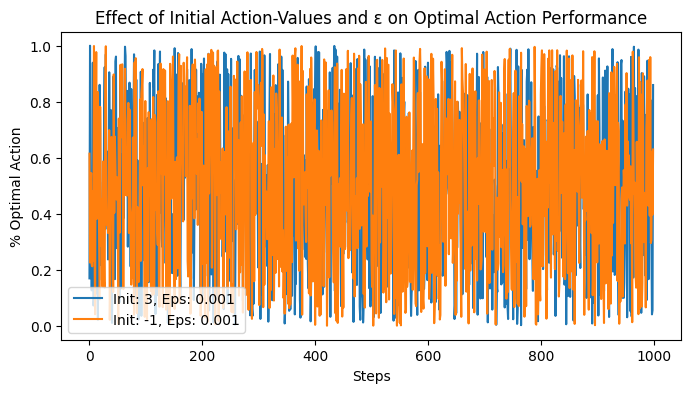

In [126]:
epsilons = [0.001]
q_inits = [3,-1]
optimal_actions = np.random.rand(len(q_inits), len(epsilons), 1000)
plot_results_optimal_actions(epsilons, q_inits, optimal_actions)